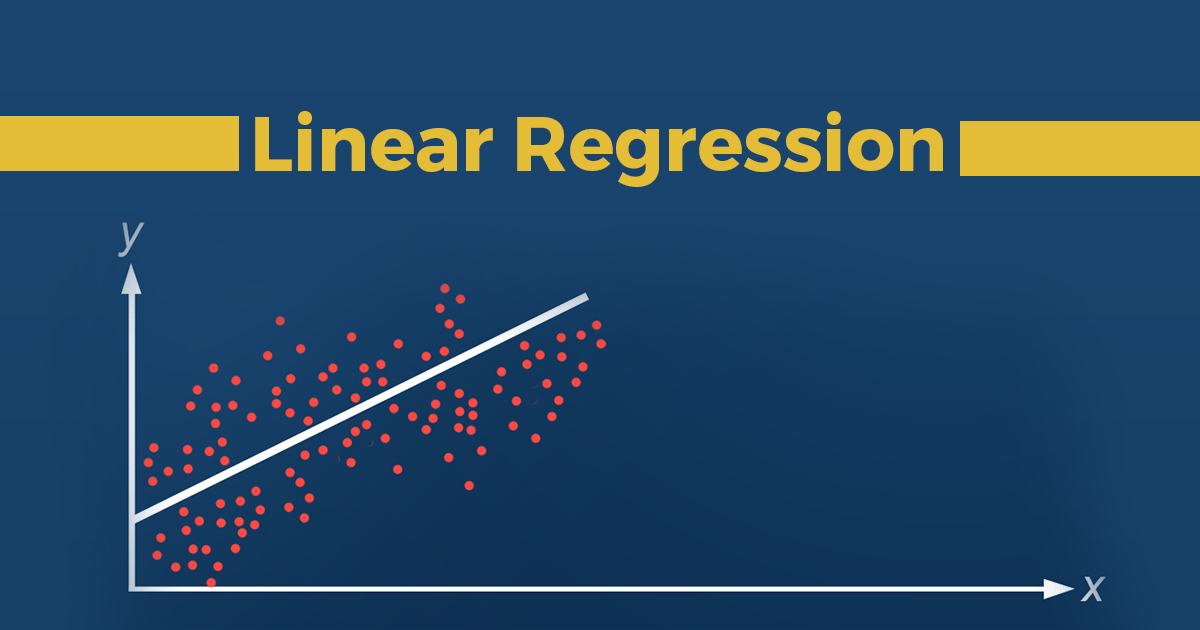

# Introduction to Linear Regression

**Linear Regression** is a simple yet powerful statistical technique used to model the relationship between a dependent variable and one or more independent variables. It helps us understand trends, make predictions, and uncover patterns in data using a straight line.



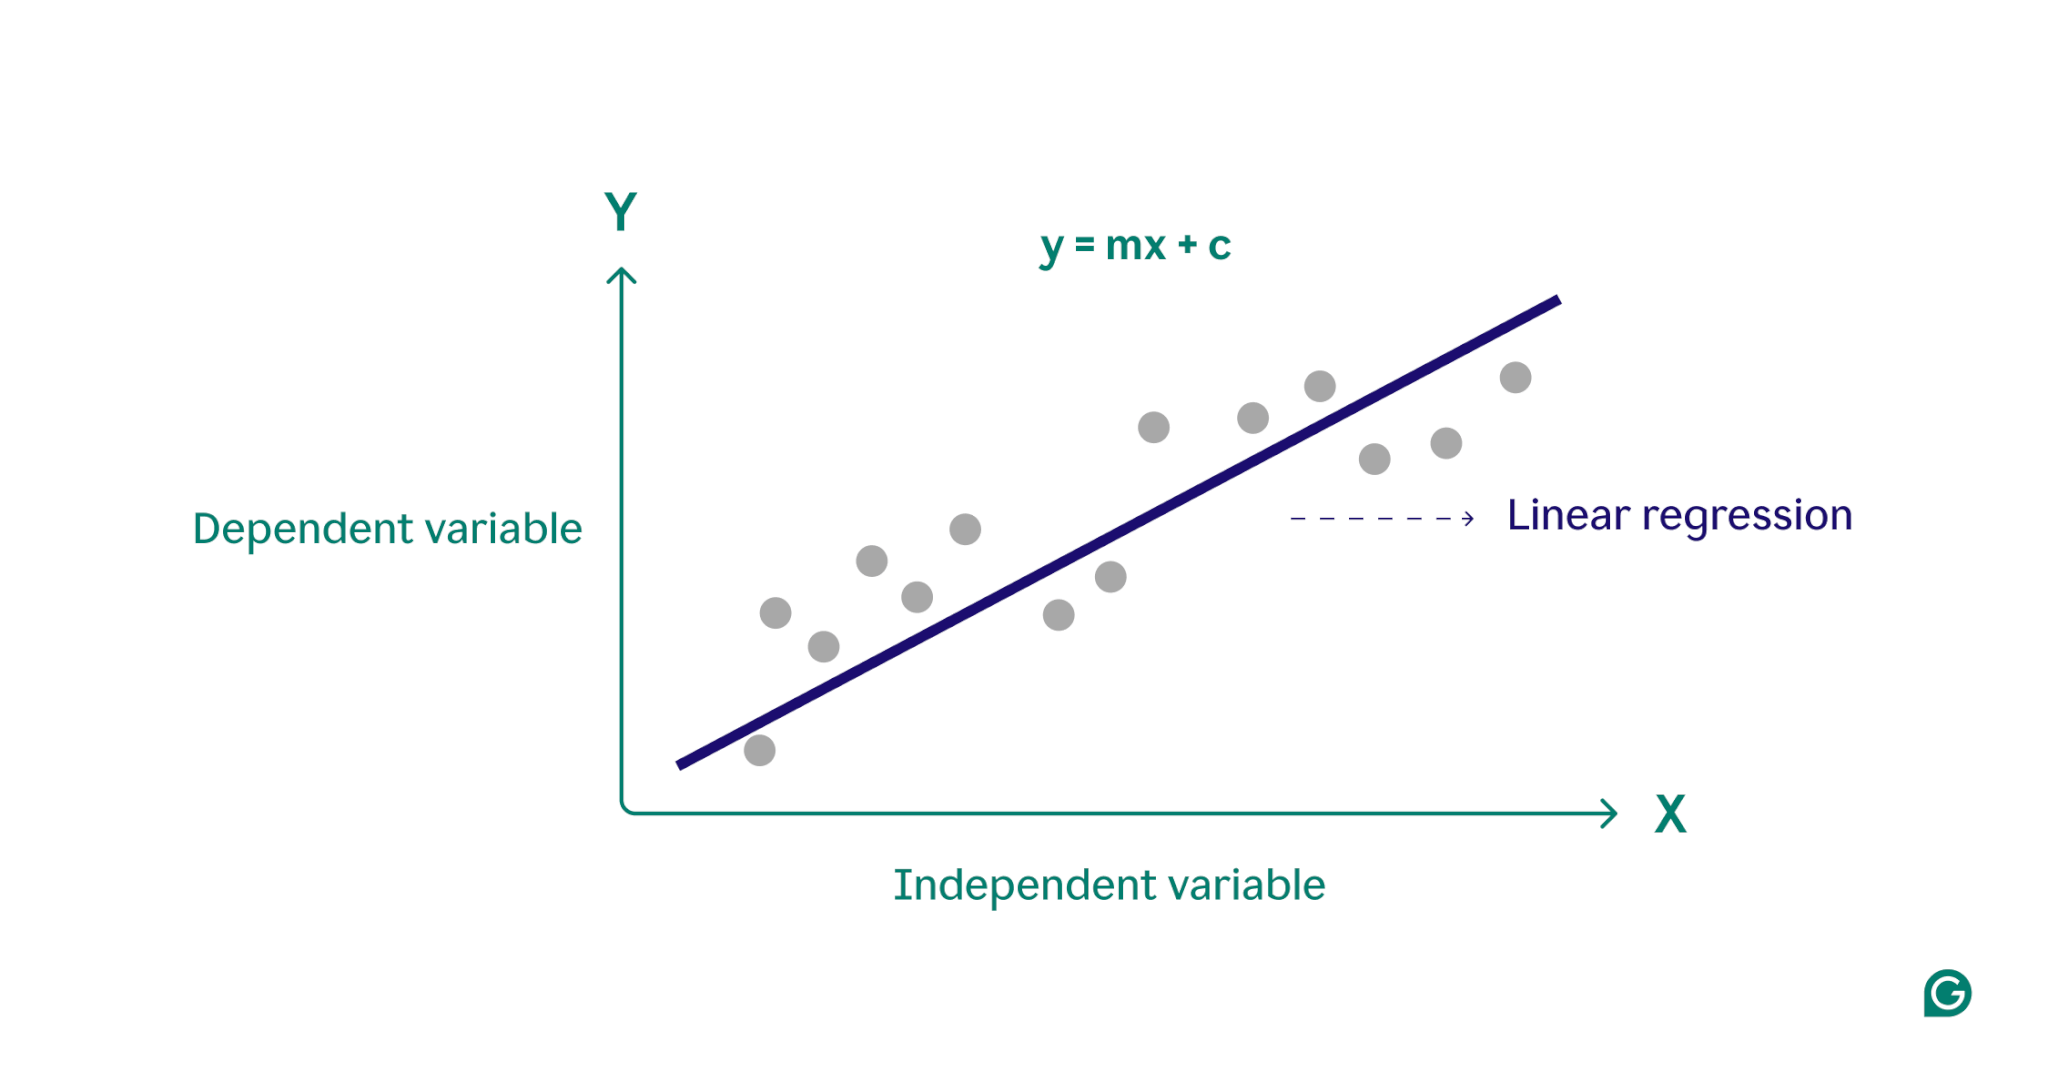

**Types of Linear Regression:**

- **Simple Linear Regression:**









*  **Definition:** Used to predict the value of a dependent variable (Y) based on one independent variable (X).
*   **Equation**:



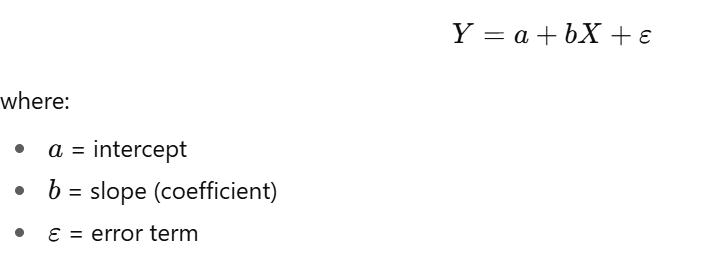



*   **Multiple Linear Regression**





*   **Definition:** Used to predict the value of a dependent variable (Y) based on two or more independent variables (X₁, X₂, ..., Xₙ).
*   **Equation:**

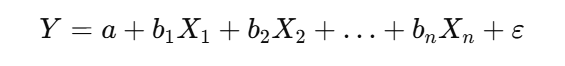



# Project Idea

This project aims to **predict Profit** using **Multiple Linear Regression** by modeling the relationship between Profit (the **dependent variable**) and several **independent variables** including R&D Spend, Administration Spend, Marketing Spend, and State.

The **goal** is to build a predictive model that estimates a company’s profit based on its investments in research and development, administrative expenses, marketing costs, and its operating state.

By analyzing historical data, the model will help businesses make data-driven decisions to optimize spending and maximize profit.

**Data Source:**
The dataset used in this project is available at:
https://www.kaggle.com/datasets/rupakroy/1000-companies-profit

# Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


#  Load the Dataset

Importing the dataset and extracting the independent and dependent variables

In [ ]:
profit_data = pd.read_csv('/content/1000_Companies.csv')
profit_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


The **independent variables** "X" :

*   X1 = R&D Spend

*   X2 = Administration
*   X3 = Marketing Spend


*   X4 = State



The **dependent variable** "Y" : profit

In [ ]:
X = profit_data.iloc[:, :-1].values
y = profit_data.iloc[:, 4].values

# Exploratory Data Analysis (EDA)

In [ ]:
#Summary statistics for each numerical column in the dataset
profit_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


- The dataset contains 1,000 records for each variable.
- The average **R&D Spend** is around 81,669, with a minimum of 0, indicating some companies did not invest in R&D.
- The **Administration** spend has a relatively small standard deviation, meaning values are less spread out compared to other columns.
- The **Marketing Spend** shows high variability (std ≈ 91,578), with some companies spending nothing and others over 471,000.
- The average **Profit** is about 119,546, ranging from a minimum of 14,681 to a maximum of 476,485.


In [ ]:
# Displaying the structure of the dataset including column names, data types, and missing values
profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


- The dataset contains **1,000 rows** and **5 columns**.
- There are **no missing values**, as all columns have 1000 non-null entries.
- The columns **R&D Spend**, **Administration**, **Marketing Spend**, and **Profit** are of type `float64`, meaning they contain numerical data with decimals.
- The **State** column is of type `object`, indicating it contains categorical data .


Based on this knowledge, we can see that the State column contains categorical (non-numeric) values. Therefore, we will exclude it from the heatmap visualization.



<Axes: >

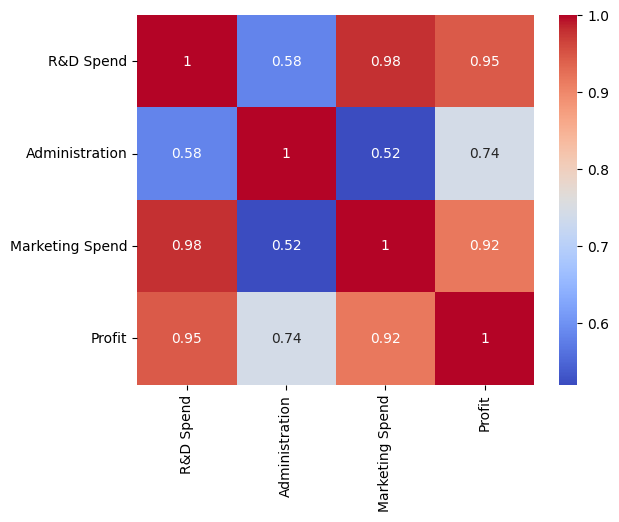

In [ ]:
# Correlation Matrix using only numerical columns
sns.heatmap(profit_data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

The **strong correlation** is defined as values above 0.8, while **weak correlation** is below 0.3, and **moderate correlation** falls between 0.3 and 0.8.



**From our data:**
- There is a **strong correlation** between R&D Spend and Profit (0.95),
Profit and Marketing Spend (0.92),
and Marketing Spend and R&D Spend (0.98).

- There is a **moderate correlation** between Administration and Profit (0.74),
Administration and Marketing Spend (0.52),
and R&D Spend and Administration (0.58).

- There is no **weak correlation** observed in this dataset.

# Preprocessing

In [ ]:
# Check for duplicate rows
profit_data.duplicated().sum()

np.int64(1)

There are duplicate values, so we will drop them

In [ ]:
profit_data = profit_data.drop_duplicates()

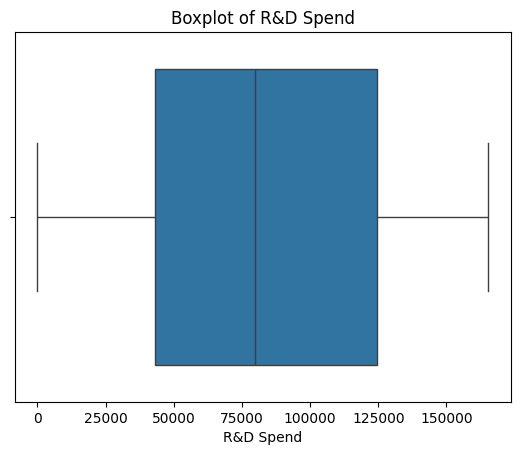

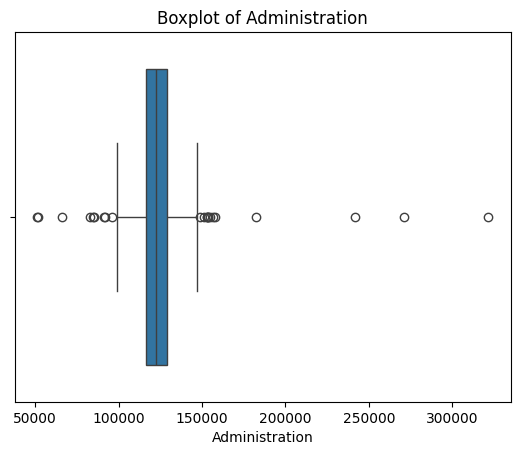

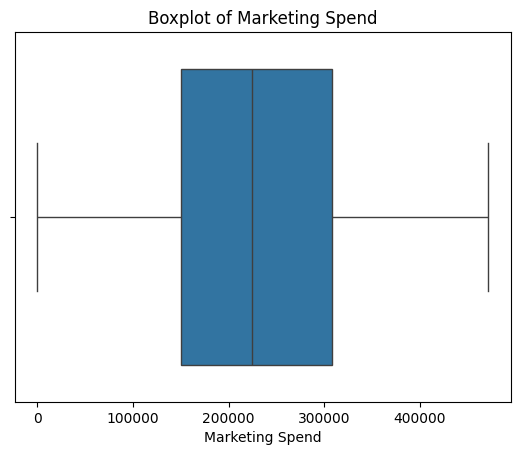

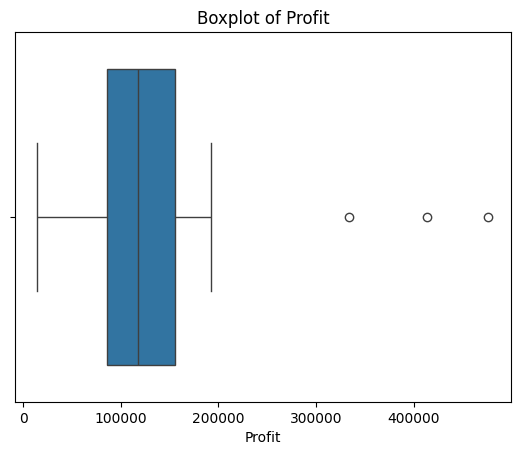

In [ ]:
# Plot boxplots for numerical columns to check for Outliers
numeric_cols = profit_data.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=profit_data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

From the **boxplots**, we can see that there are some outliers in the *'Administration'* and *'Profit'* columns. This means that some companies have unusually high or low administration expenses compared to the rest, and some companies have significantly higher profits compared to others.

**Based on that, we will build the model both with and without outliers to see which one produces a more accurate model.**

In [ ]:
profit_data.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


Based on this knowledge, we can see that the *'State'* column contains categorical (non-numeric) values. Therefore, we need to convert these categorical values into numerical values using encoding techniques.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

In [ ]:
# Define the column(s) to apply OneHotEncoder on (here column index 3)
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [3])  # Apply OneHotEncoder to the 4th column (index 3)
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Fit and transform the data
X = column_transformer.fit_transform(X)

In [ ]:
#Avoiding Dummy Variable Trap
X = X[:,1:]

# Build Multiple Regression Model with Outliers



**Split the data into train and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Fitting Multiple Linear Regression Model to training set**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Predicting the Test set results**

In [ ]:
y_pred = model.predict(X_test)

# Model Evaluation with outliers

**Evaluation Metrics:**



1.   **R² Score (Coefficient of Determination):** Measures how much of the variance in the actual values can be explained by the model.
   - Range: Typically between 0 and 1 (can be negative if the model performs poorly).
   - Interpretation:
        * Higher is better. R² = 1 means perfect predictions.
        * Close to 0 or negative means poor model performance.



2.   **MAE (Mean Absolute Error):** The average of the absolute differences between actual and predicted values.
    - Unit: Same as the original data.
    - Interpretation:
        * Lower is better (smaller errors).
        * Higher values mean predictions are farther from actual values.






3.   **MSE (Mean Squared Error):** The average of the squared differences between actual and predicted values.
    - Unit: Square of the original data's unit.
    - Interpretation:
        * Lower is better (smaller errors).
        * Higher values mean larger prediction errors.
        * Penalizes large errors more heavily than MAE.



In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9112695892268908
MAE: 2300.221750987083
MSE: 192148061.81505656


**The model has strong overall accuracy (high R²), but the relatively high MAE and MSE indicate that while most predictions are close, some are significantly off.**

# Build Multiple Regression Model without Outliers



**Make a copy of the data so we can preprocess it for outliers.**

In [ ]:
data_clean = profit_data.copy()

Based on the previous information in the preprocessing part, we have outliers in two columns: '*Administration*' and '*Profit*'. Now, we will proceed with processing them.

In [ ]:
upper_limit = data_clean['Administration'].quantile(0.95)
lower_limit = data_clean['Administration'].quantile(0.05)

data_clean['Administration'] = np.where(data_clean['Administration'] > upper_limit, upper_limit,
                        np.where(data_clean['Administration'] < lower_limit, lower_limit, data_clean['Administration']))

In [ ]:
upper_limit = data_clean['Profit'].quantile(0.95)
lower_limit = data_clean['Profit'].quantile(0.05)

data_clean['Profit'] = np.where(data_clean['Profit'] > upper_limit, upper_limit,
                        np.where(data_clean['Profit'] < lower_limit, lower_limit, data_clean['Profit']))

**Summary of the outlier handling code:** For both '*Administration*' and *'Profit'* columns, we calculate the 5th and 95th percentiles to define lower and upper limits. Then, we cap the values below the 5th percentile to the lower limit and values above the 95th percentile to the upper limit. This process reduces the impact of extreme outliers while maintaining the overall data distribution.

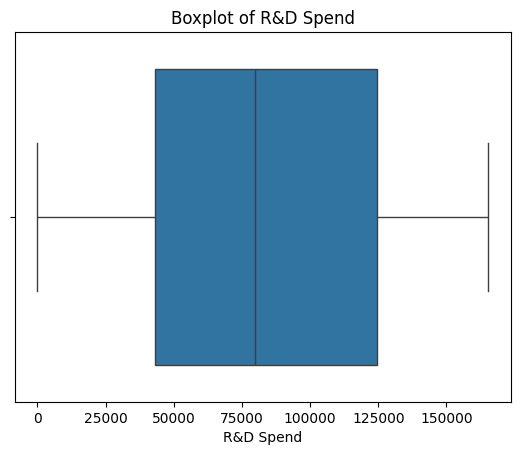

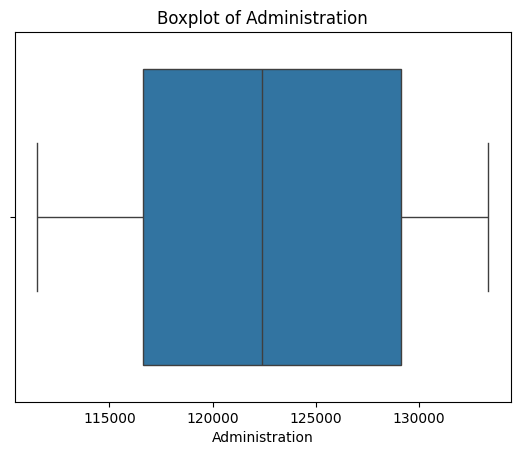

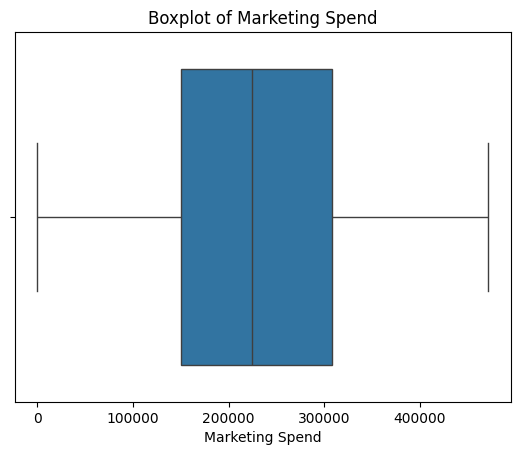

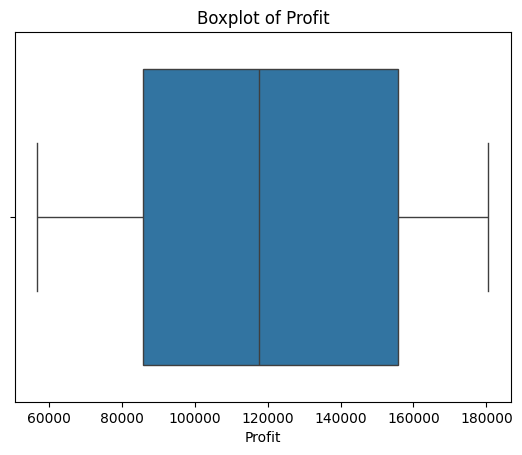

In [ ]:
numeric_cols = data_clean.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=data_clean, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

**We used boxplots to verify that we have effectively handled the outliers**

Now, we will select the independent variables and the dependent variable

In [ ]:
X = data_clean.iloc[:, :-1].values
y = data_clean.iloc[:, 4].values

The *'State'* column is categorical, so we need to convert it to numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

In [ ]:
# Define the column(s) to apply OneHotEncoder on (here column index 3)
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [3])  # Apply OneHotEncoder to the 4th column (index 3)
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Fit and transform the data
X = column_transformer.fit_transform(X)

In [ ]:
#Avoiding Dummy Variable Trap
X = X[:,1:]

**Split the data into train and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Fitting Multiple Linear Regression Model to training set**

In [ ]:
model_after_pre = LinearRegression()
model_after_pre.fit(X_train, y_train)

LinearRegression()

**Predicting the Test set results**

In [ ]:
y_pred = model.predict(X_test)

# Model Evaluation without outliers

In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9885764661347287
MAE: 1283.9434854612962
MSE: 17747075.997660566


**This model performs very well, with high overall accuracy (R² close to 1) and significantly lower errors (MAE and MSE), indicating better predictions and less impact from outliers or noise.**

The model with outlier treatment performs significantly better than the model without it.
It has higher accuracy (higher R²) and much lower error metrics (MAE and MSE),
**meaning removing outliers improved the model’s predictions and reduced the impact of extreme values.**


# Conclusion

- The multiple linear regression model achieved a very high R² score of 0.989, indicating that approximately 98.9% of the variance in Profit can be explained by the independent variables in the dataset.

- The Mean Absolute Error (MAE) of about 1284 and Mean Squared Error (MSE) of approximately 17,747,076 confirm that the model predictions are quite accurate and have low average error.

**From the data correlations:**

- There is a strong positive correlation between R&D Spend and Profit (0.95), and between Marketing Spend and Profit (0.92), showing these two features are highly influential in driving profit.

- Additionally, R&D Spend and Marketing Spend are also strongly correlated (0.98), indicating related spending patterns.

- Administration Spend shows a moderate correlation with Profit (0.74) and other variables, meaning it has a less but still meaningful impact.

- No weak correlations were observed, confirming all variables contribute to some extent.





These insights suggest that companies should prioritize investments in R&D and Marketing to maximize profitability, while also considering administrative costs.

The model can be used as a reliable tool for forecasting profit and supporting strategic budget decisions.

For future improvements, exploring more advanced or nonlinear models and incorporating additional relevant features could enhance predictive performance even further.